In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
x=6*np.random.rand(200,1)-3
y=0.8 * x**2 + 0.9*x + 2 + np.random.rand(200,1)

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_17500\859106829.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y,'b.',color='b')


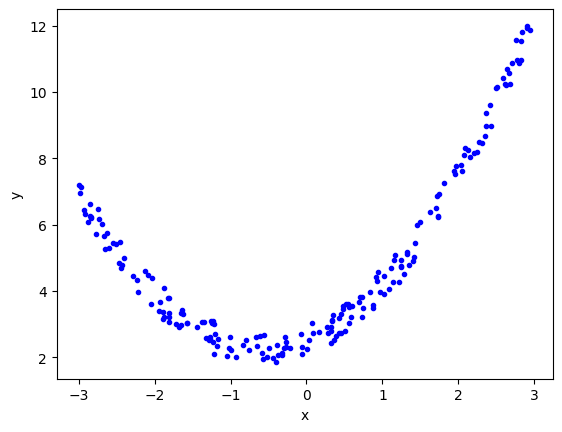

In [32]:

plt.plot(x,y,'b.',color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [7]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.24095437440500134

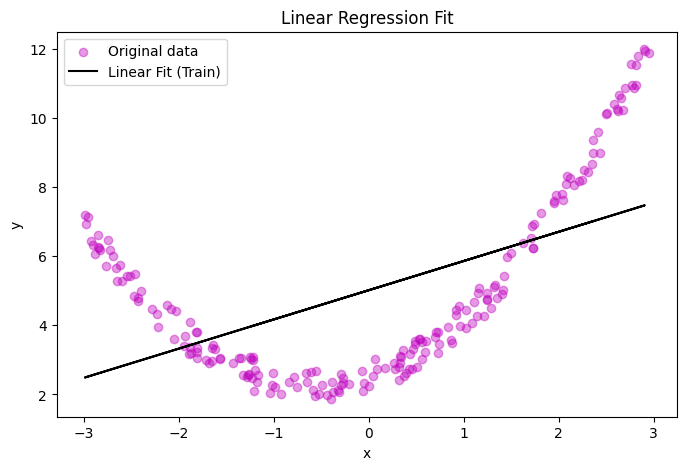

In [9]:
# plt.plot(X_train,lr.predict(X_train),color='b')
# plt.plot(x,y,'b')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='m', alpha=0.4, label='Original data')
plt.plot(X_train, lr.predict(X_train), color='black', label='Linear Fit (Train)')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Linear Regression Fit' )
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [54]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [55]:
print(X_train[0])
print(X_train_trans[0])

[2.81945911]
[1.         2.81945911 7.94934969]


In [56]:
# include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
y_pred=lr.predict(X_test_trans)

In [58]:
r2_score(y_test,y_pred)

0.9005984592205168

In [59]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.929247   0.54509661]]
[1.7591572]


In [60]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

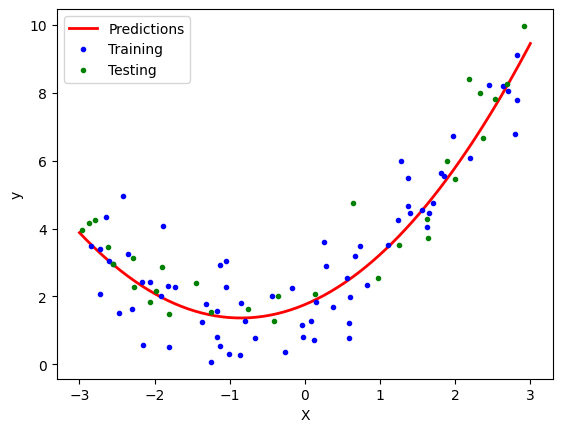

In [61]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training ')
plt.plot(X_test, y_test, "g.",label='Testing ')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()